### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [9]:
sample_data.dtypes

user_id            int64
age               object
drinks_coffee       bool
height           float64
dtype: object

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [6]:
diffs=[]
for i in range(10000):
    sample = sample_data.sample(200,replace=True)
    mean_coffee = sample[sample['drinks_coffee']==True]['height'].mean()
    mean_noncoffee = sample[sample['drinks_coffee']==False]['height'].mean()
    diffs.append(mean_coffee - mean_noncoffee)
np.percentile(diffs,0.5) , np.percentile(diffs , 99.5)    

(0.10258900080919674, 2.5388333707966284)

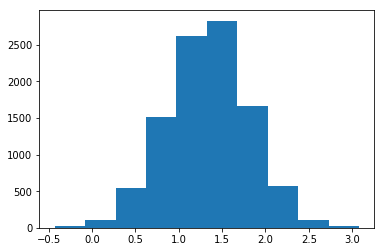

In [7]:
plt.hist(diffs);

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [10]:
diffs=[]
for i in range(10000):
    sample = sample_data.sample(200,replace=True)
    mean_greater = sample[sample['age']=='>=21']['height'].mean()
    mean_young = sample[sample['age']== '<21']['height'].mean()
    diffs.append(mean_greater - mean_young)
np.percentile(diffs,0.5) , np.percentile(diffs , 99.5)  

(3.3464427236324648, 5.1126247168915251)

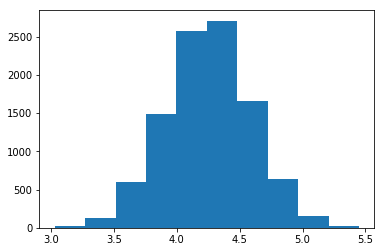

In [11]:
plt.hist(diffs);

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [15]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)

(1.0809572510875132, 2.6258697660461596)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [16]:
diffs=[]
for i in range(10000):
    sample = sample_data.sample(200,replace=True)
    mean_coffee = sample.query("age== '>=21' and drinks_coffee == True")['height'].mean()
    mean_noncoffee = sample.query("age== '>=21' and drinks_coffee == False")['height'].mean()
    diffs.append(mean_noncoffee - mean_coffee)
np.percentile(diffs,2.5) , np.percentile(diffs , 97.5)  

(1.8281567318141771, 4.4080299424394704)